In [30]:
#IMPORTING LIBRARIES 

import pandas as pd
import numpy as np 
import yfinance as yf
from datetime import datetime

In [32]:
import matplotlib.pyplot as plt

In [34]:
stocks = 'RELIANCE.NS, ADANIENT.NS, LT.NS, GAIL.NS'
end= datetime.now()
start = datetime(end.year - 5, end.month, end.day)

data = yf.download(stocks, start=start, end=end)

portfolio = data['Adj Close']
portfolio.head()


[*********************100%***********************]  4 of 4 completed


Ticker,ADANIENT.NS,GAIL.NS,LT.NS,RELIANCE.NS
Date,,,,
2019-09-16 00:00:00+00:00,144.529541,68.710136,1225.972656,1087.592041
2019-09-17 00:00:00+00:00,142.350952,69.875618,1198.690552,1075.644775
2019-09-18 00:00:00+00:00,142.747055,71.491379,1202.614014,1083.055786
2019-09-19 00:00:00+00:00,141.162613,70.484840,1186.828613,1059.116577
2019-09-20 00:00:00+00:00,147.648865,71.358955,1287.928467,1126.756958


In [35]:
portfolio.tail()

Ticker,ADANIENT.NS,GAIL.NS,LT.NS,RELIANCE.NS
Date,,,,
2024-09-09 00:00:00+00:00,2964.149902,217.750000,3578.300049,2924.899902
2024-09-10 00:00:00+00:00,2986.399902,219.929993,3596.149902,2923.050049
2024-09-11 00:00:00+00:00,2937.850098,217.190002,3536.949951,2903.000000
2024-09-12 00:00:00+00:00,2991.000000,220.639999,3622.000000,2959.600098
2024-09-13 00:00:00+00:00,2968.350098,218.869995,3613.000000,2945.250000


In [38]:
#Daily returns of the portfolio
returns = portfolio.pct_change().dropna()
print(returns)

Ticker                     ADANIENT.NS   GAIL.NS     LT.NS  RELIANCE.NS
Date                                                                   
2019-09-17 00:00:00+00:00    -0.015074  0.016962 -0.022253    -0.010985
2019-09-18 00:00:00+00:00     0.002783  0.023123  0.003273     0.006890
2019-09-19 00:00:00+00:00    -0.011100 -0.014079 -0.013126    -0.022103
2019-09-20 00:00:00+00:00     0.045949  0.012401  0.085185     0.063865
2019-09-23 00:00:00+00:00     0.022133  0.048998  0.082891    -0.012078
...                                ...       ...       ...          ...
2024-09-09 00:00:00+00:00    -0.003798 -0.022754  0.000993    -0.001621
2024-09-10 00:00:00+00:00     0.007506  0.010011  0.004988    -0.000632
2024-09-11 00:00:00+00:00    -0.016257 -0.012458 -0.016462    -0.006859
2024-09-12 00:00:00+00:00     0.018091  0.015885  0.024046     0.019497
2024-09-13 00:00:00+00:00    -0.007573 -0.008022 -0.002485    -0.004849

[1236 rows x 4 columns]


In [40]:
#Defining the weights of the portfolio

weights = np.array([0.3, 0.25, 0.25, 0.2])


In [42]:
#Annualising the returns
portfolio_return = np.sum(weights * returns.mean()) * 252

#Annualising the covariance
cov_matrix = returns.cov()
annual_cov_matrix = cov_matrix * 252 

#Portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(annual_cov_matrix, weights))

#Portfolio standard deviation
portfolio_volatility = np.sqrt(portfolio_variance)

print("Expected Annual Return: {:.2%}".format(portfolio_return))
print("Annual Volatility: {:.2%}".format(portfolio_volatility))

Expected Annual Return: 41.88%
Annual Volatility: 27.82%


In [44]:
from pypfopt import risk_models, expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

In [46]:
# Expected returns
mu = expected_returns.mean_historical_return(portfolio) 

#Covariance matrix
S = risk_models.sample_cov(portfolio)

print(S)

Ticker       ADANIENT.NS   GAIL.NS     LT.NS  RELIANCE.NS
Ticker                                                   
ADANIENT.NS     0.283208  0.058073  0.051205     0.052881
GAIL.NS         0.058073  0.130318  0.040719     0.036169
LT.NS           0.051205  0.040719  0.083803     0.035009
RELIANCE.NS     0.052881  0.036169  0.035009     0.089468


In [60]:
from pypfopt import EfficientFrontier
import matplotlib.pyplot as plt

In [62]:
#Efficient Frontier
ef = EfficientFrontier(mu, S)

In [64]:
min_variance_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

OrderedDict([('ADANIENT.NS', 0.01385), ('GAIL.NS', 0.19155), ('LT.NS', 0.41089), ('RELIANCE.NS', 0.38372)])


In [66]:
portfolio_performance = ef.portfolio_performance(verbose=True)

Expected annual return: 25.1%
Annual volatility: 23.7%
Sharpe Ratio: 0.97


Expected annual return: 25.1%
Annual volatility: 23.7%
Sharpe Ratio: 0.97


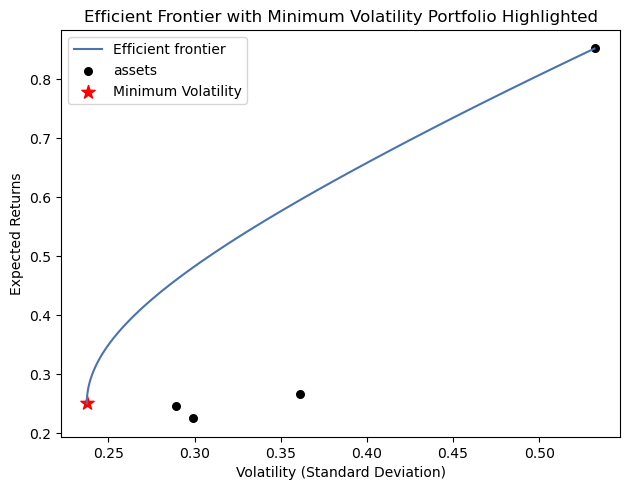

In [90]:
from pypfopt import plotting, EfficientFrontier
import matplotlib.pyplot as plt

#Expected returns and the covariance matrix
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Restating the efficient frontier
ef = EfficientFrontier(mu, S)

#The Minimum Volatility portfolio
min_volatility_weights = ef.min_volatility()
min_vol_perf = ef.portfolio_performance(verbose=True)

#Restating the efficient Frontier again for plotting purposes
ef_for_plotting = EfficientFrontier(mu, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef_for_plotting, ax=ax, show_assets=True)
ax.scatter(min_vol_perf[1], min_vol_perf[0], marker="*", s=100, color='r', label="Minimum Volatility")
ax.legend()
plt.title('Efficient Frontier with Minimum Volatility Portfolio Highlighted')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.show()

In [80]:
portfolio_returns = (returns * weights).sum(axis=1)

from scipy.stats import norm

# Calculate mean and standard deviation of portfolio returns
portfolio_mean = portfolio_returns.mean()
portfolio_std = portfolio_returns.std()

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate VaR at the confidence level
VaR_parametric = norm.ppf(1 - confidence_level, portfolio_mean, portfolio_std)

# Calculate CVaR
CVaR_parametric = portfolio_mean + (norm.pdf(norm.ppf(1 - confidence_level)) * portfolio_std) / (1 - confidence_level)

In [82]:
# Calculate VaR at the confidence level
VaR_historical = portfolio_returns.quantile(1 - confidence_level)

# Calculate CVaR
CVaR_historical = portfolio_returns[portfolio_returns <= VaR_historical].mean()

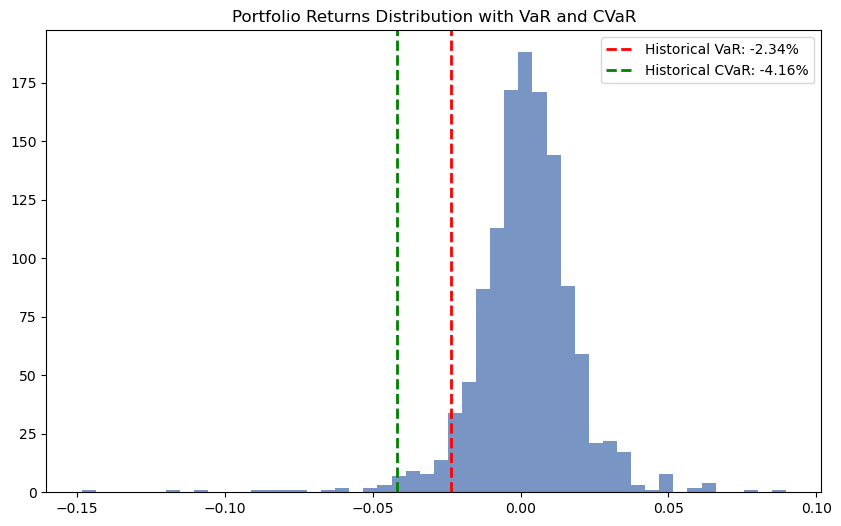

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, alpha=0.75)
plt.axvline(x=VaR_historical, color='r', linestyle='dashed', linewidth=2, label=f'Historical VaR: {VaR_historical:.2%}')
plt.axvline(x=CVaR_historical, color='g', linestyle='dashed', linewidth=2, label=f'Historical CVaR: {CVaR_historical:.2%}')
plt.title('Portfolio Returns Distribution with VaR and CVaR')
plt.legend()
plt.show()